In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Houses prices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.condition.value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Data Cleaning

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert date from object to datetime format
df['yr_built'] = pd.to_datetime(df['yr_built'])
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

In [ ]:
import math
df.bathrooms = df.bathrooms.apply(lambda x : math.floor(x))  # convert bathrooms from float to integer
df.floors = df.floors.apply(lambda x : math.floor(x))        # convert floors from float to integer

## Detect Outliers

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000


<AxesSubplot:xlabel='price'>

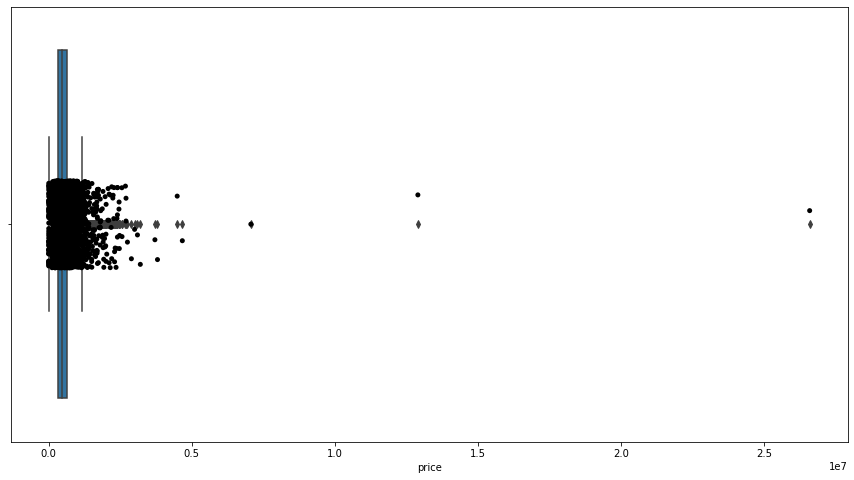

In [ ]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=(df.price))
sns.stripplot(x=df.price, color='black')

<AxesSubplot:xlabel='sqft_living'>

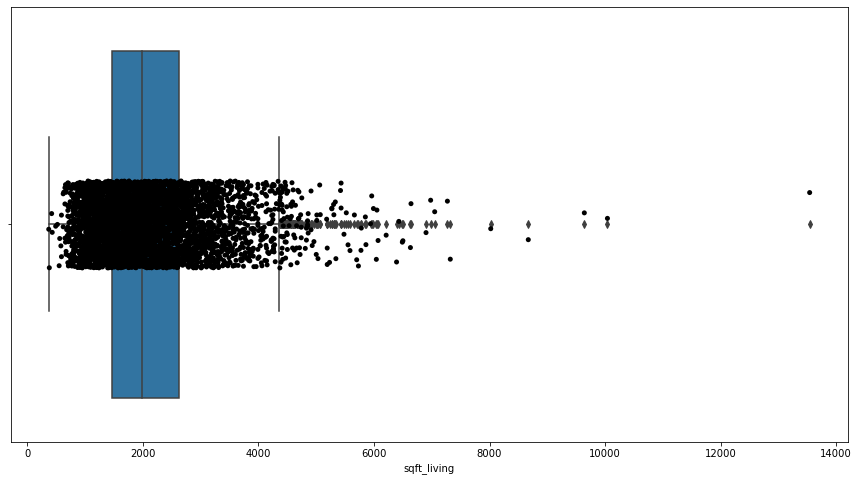

In [ ]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=(df.sqft_living))
sns.stripplot(x=df.sqft_living, color='black')

<AxesSubplot:xlabel='sqft_lot'>

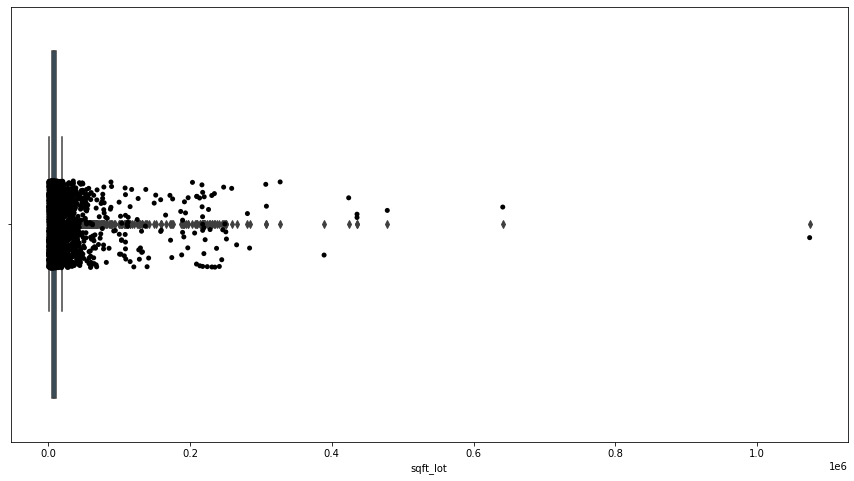

In [ ]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=(df.sqft_lot))
sns.stripplot(x=df.sqft_lot, color='black')

<AxesSubplot:xlabel='sqft_above'>

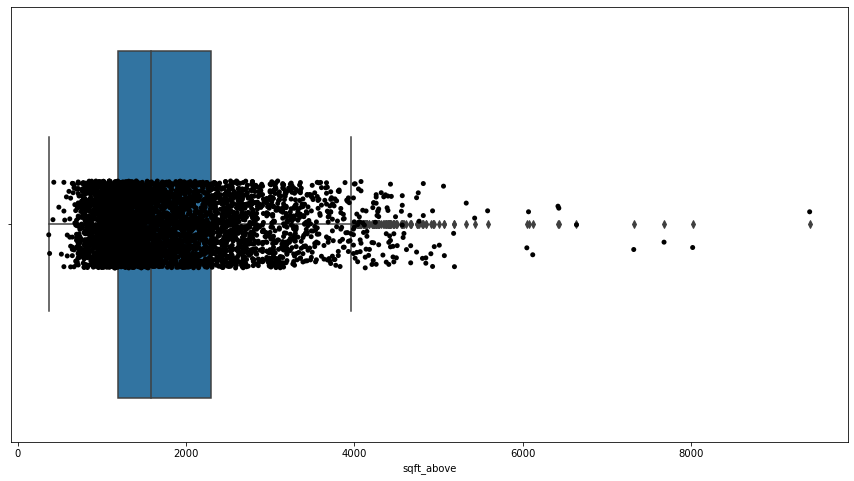

In [ ]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=(df.sqft_above))
sns.stripplot(x=df.sqft_above, color='black')

<AxesSubplot:xlabel='sqft_basement'>

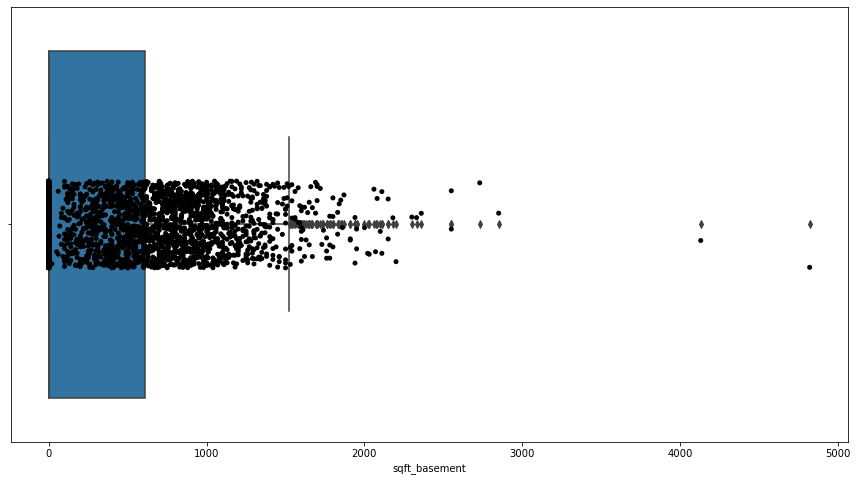

In [ ]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=(df.sqft_basement))
sns.stripplot(x=df.sqft_basement, color='black')

In [ ]:
from datasist.structdata import detect_outliers

### Replace Outliers by the Median

In [ ]:
for c in ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:

    outliers_indices = detect_outliers(df, 0, [c])

    median = df[c].median()

    df[c].iloc[outliers_indices] = median

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\4193163277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indices] = median


# Split input features and target variable

In [ ]:
X = df.drop(['price', 'date', 'yr_built', 'yr_renovated'], axis=1)
y = df.price

## Dealing with Categorical data

#### One Hot Encoding

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.0,1,1340,7912,1,0,0,3,1340,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,2,3650,9050,2,0,4,5,3370,280,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2,1930,11947,1,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2,2000,8030,1,0,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2,1940,10500,1,0,0,4,1140,800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1,1510,6360,1,0,0,4,1510,0,...,0,0,0,0,0,0,0,0,0,0
4596,3.0,2,1460,7573,2,0,0,3,1460,0,...,0,0,0,0,0,0,0,0,0,0
4597,3.0,2,3010,7014,2,0,0,3,3010,0,...,0,0,0,0,0,0,0,0,0,0
4598,4.0,2,2090,6630,1,0,0,3,1070,1020,...,0,0,0,0,1,0,0,0,0,0


## Split Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
1898,4.0,2,2770,7683,2,0,0,4,2770,0,...,0,0,0,0,0,0,0,0,0,0
1370,4.0,3,3720,7683,2,0,0,3,3720,0,...,0,0,0,0,0,0,0,0,0,0
3038,4.0,2,2810,11120,2,0,0,3,2810,0,...,0,0,0,0,0,0,0,0,0,0
2361,4.0,3,4030,10800,2,0,0,3,1590,0,...,0,0,0,0,0,0,0,0,0,0
156,3.0,2,2000,7000,2,0,0,3,2000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,1,1180,5002,1,0,0,3,1180,0,...,1,0,0,0,0,0,0,0,0,0
466,4.0,2,2520,6000,1,0,0,3,1400,1120,...,0,0,0,0,0,0,0,0,0,0
3092,3.0,1,1150,8145,1,0,0,4,990,160,...,1,0,0,0,0,0,0,0,0,0
3772,2.0,1,910,2002,1,0,0,3,910,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 2.08276511e+04, -1.90542339e+03, -3.88285017e+01, ...,
        8.11569920e+04, -2.62720916e+04, -1.41194578e+04])

In [ ]:
lr.predict(x_train)

array([684999.99999899, 857000.00001322, 675000.00002073, ...,
       289999.99999755, 600000.00000128, 475000.00000215])

### Difference between Actual and Predicted values

In [ ]:
abs(y_train - lr.predict(x_train))

1898    0.000001
1370    0.000013
3038    0.000021
2361    0.000005
156     0.000002
          ...   
4426    0.000002
466     0.000003
3092    0.000002
3772    0.000001
860     0.000002
Name: price, Length: 3680, dtype: float64